<a href="https://colab.research.google.com/github/Krithika-Devi/training/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries

Numpy is requried whenever calculations are required (calculating means, medians, sqaure root, etc.).
pandas is a great module for data processing and data frames. 

We can choose alias names to our modules for the sake of convenience (numpy --> np, pandas --> pd)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Exploratory Data Analysis (EDA)

After loading the data, let us examine it. It is usually not recommended to throw all the data into a predictive model without first understanding the data. this would often help us improving our model.

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv')      

In [6]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
361,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
90,91,0,3,"Christmann, Mr. Emil",male,29.0,0,0,343276,8.0500,NaN,S
744,745,1,3,"Stranden, Mr. Juho",male,31.0,0,0,STON/O 2. 3101288,7.9250,NaN,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S


In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
titanic.shape

(891, 12)

# Exploratory Data Analysis (EDA)

After loading the data, let us examine it. It is usually not recommended to throw all the data into a predictive model without first understanding the data. this would often help us improving our model.

In [9]:
print('Total number of passangers in the training data...', len(titanic))
print('Number of passangers in the training data who survived...', len(titanic[titanic['Survived'] == 1]))

Total number of passangers in the training data... 891
Number of passangers in the training data who survived... 342


Now, similarly, let's see what is the % of men and women who survived, and then by the same token with class and age:

In [10]:
print('% of men who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic['Survived'][titanic['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [11]:
print('% of passengers who survived in first class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 1]))
print('% of passengers who survived in third class', 100*np.mean(titanic['Survived'][titanic['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in third class 24.236252545824847


In [12]:
print('% of children who survived', 100*np.mean(titanic['Survived'][titanic['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic['Survived'][titanic['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings
warnings.filterwarnings("ignore")

In [20]:
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

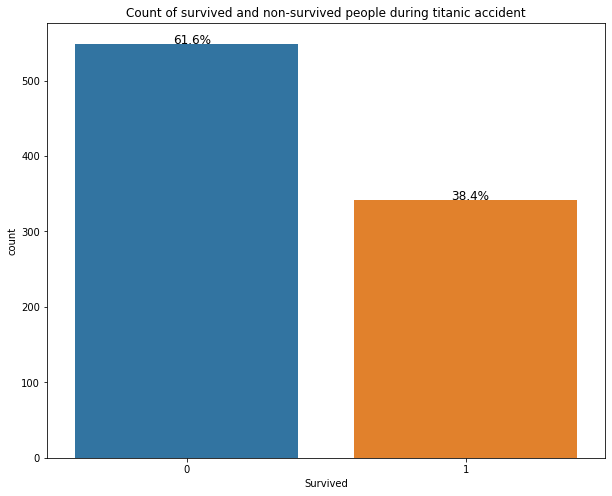

In [23]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Survived', data=titanic)
plt.title('Count of survived and non-survived people during titanic accident')
without_hue(ax, titanic.Survived)

Text(0.5, 1.0, 'Distribution of Passenger Class')

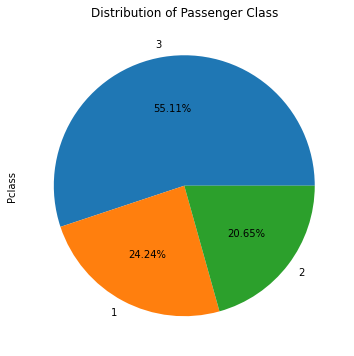

In [24]:
titanic['Pclass'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f%%')
plt.title("Distribution of Passenger Class")

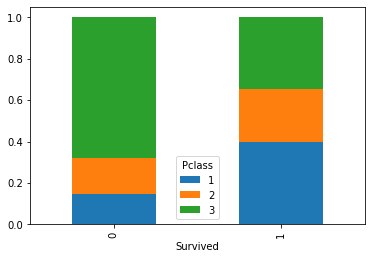

In [25]:
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize='index').plot.bar(stacked=True)

Text(0.5, 1.0, 'Fare paid')

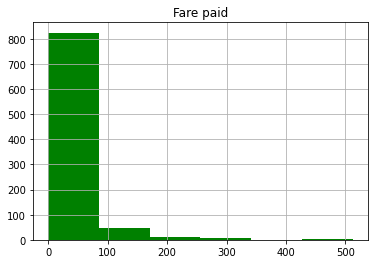

In [27]:
titanic.Fare.hist(bins=6,color='green');
plt.title("Fare paid")

Text(0.5, 1.0, 'Distribution of price according to Class')

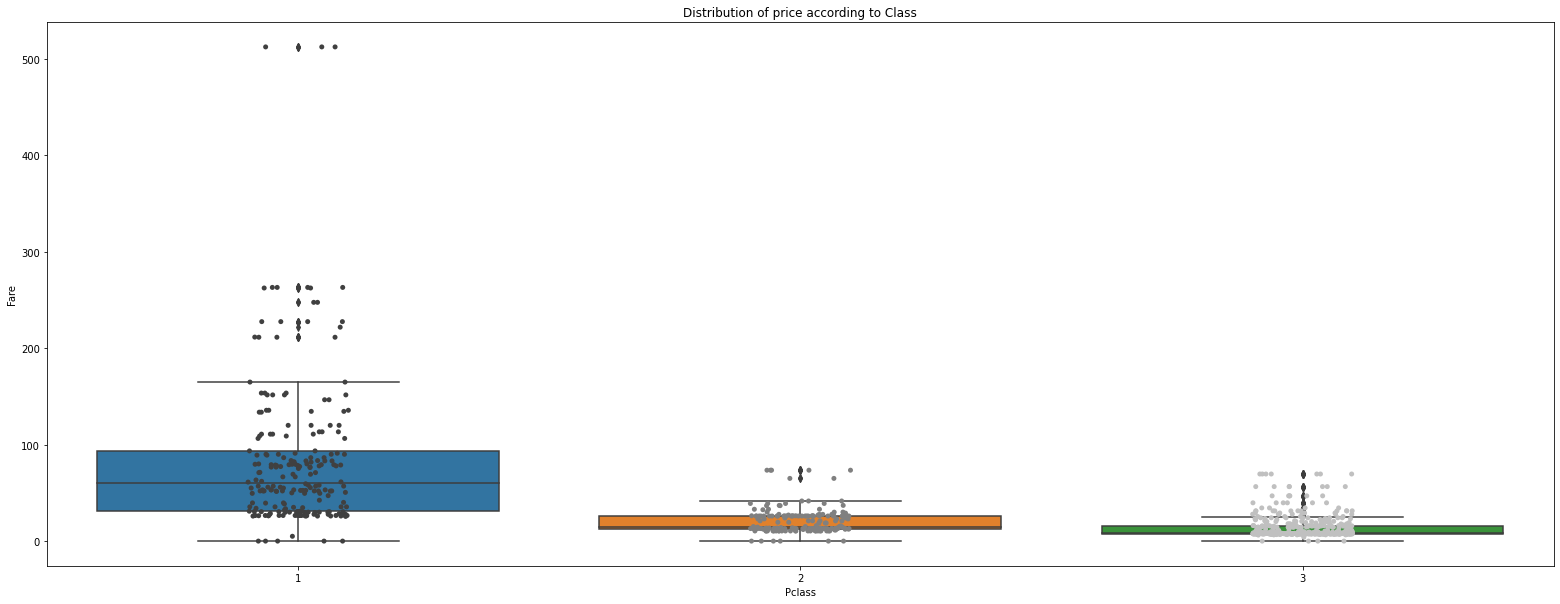

In [29]:
plt.figure(figsize =(27, 10))
sns.boxplot(y ='Fare', x ='Pclass', data = titanic)
sns.stripplot(y ='Fare', x ='Pclass', data = titanic, palette='gray')
plt.title("Distribution of price according to Class")

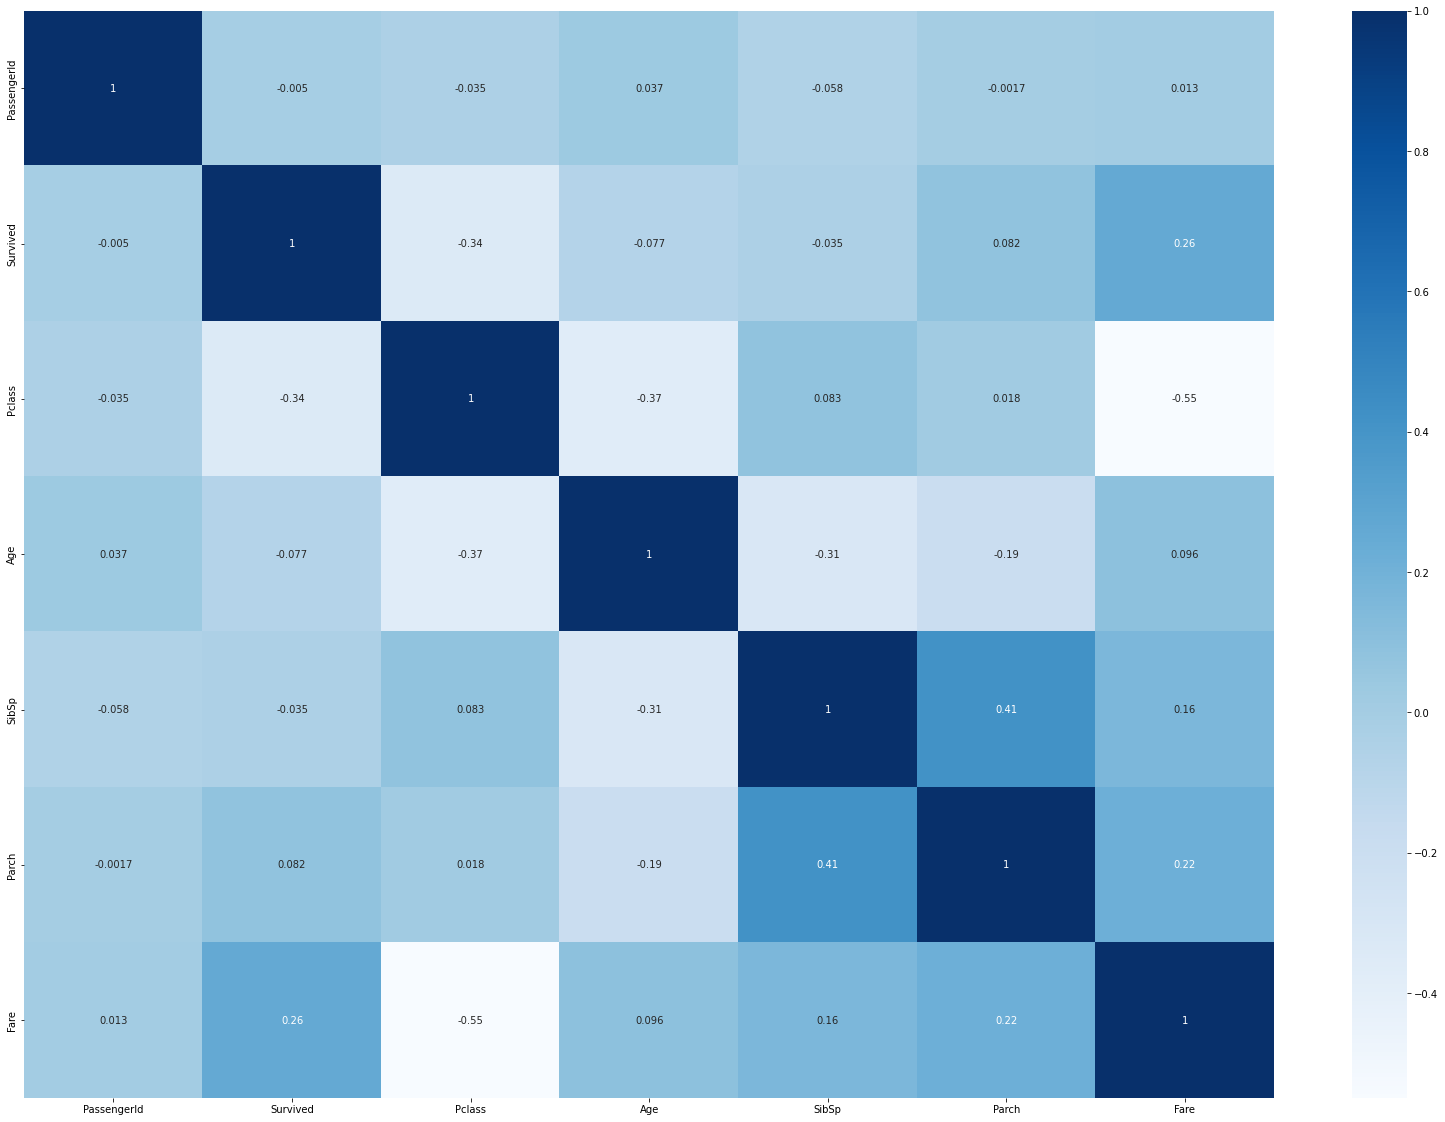

In [31]:
fig=plt.figure(figsize=(28,20))
sns.heatmap(titanic.corr(), annot=True, cmap='Blues')
plt.show()
#fig.savefig('IBMempheatmap.png')
